<a href="https://colab.research.google.com/github/SteveChengChen/data-analysis/blob/main/5243_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread

extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/"

X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')


adata = ad.AnnData(X.T)

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [8]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

X = X.tocsr()

X = X.transpose()

gene_names = genes.iloc[:, 0].astype(str)
cell_names = cells.iloc[:, 0].astype(str)

adata = ad.AnnData(X)
adata.obs_names = cell_names
adata.var_names = gene_names

cells.columns = ["barcode_cells"]
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')

print("Initial AnnData shape:", adata.shape)
print("adata.obs columns:", adata.obs.columns)

Initial AnnData shape: (13199, 31535)
adata.obs columns: Index(['barcode_cells', 'cell', 'sample', 'DevelopmentalStage',
       'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample',
       'Lane', 'Condition', 'batch'],
      dtype='object')


In [9]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [10]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [11]:
adata.X = adata.X.tocsr()

In [12]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

In [13]:
import anndata as ad

file_path = "/content/drive/MyDrive/TA/cleaned_processed_frogtail.h5ad"
adata = ad.read_h5ad(file_path)

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [15]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [16]:
adata.layers["counts"] = adata.X.copy()

In [17]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [18]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

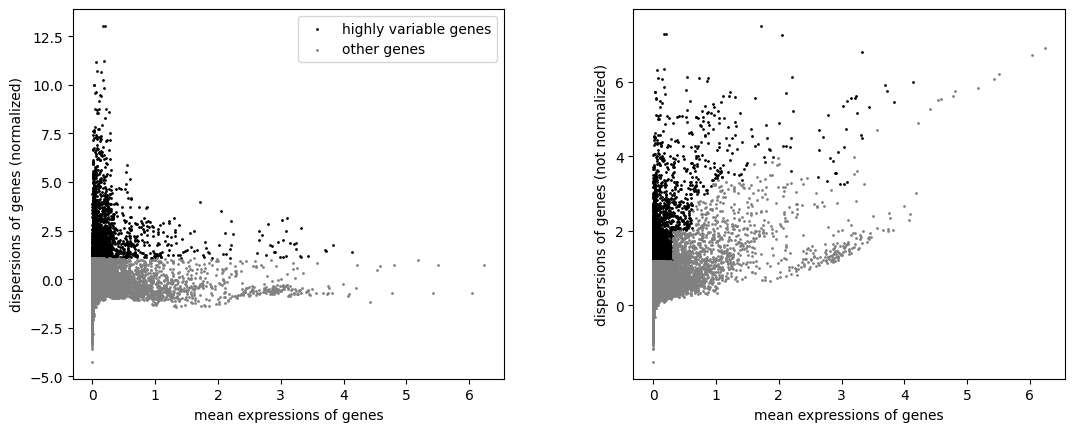

In [19]:
import matplotlib.pyplot as plt

sc.pl.highly_variable_genes(adata, show=False)
plt.show()

In [20]:
import pandas as pd

file_path = "/content/drive/MyDrive/TA/aav9996_tables3.xlsx"

# Create an ExcelFile object for quick access to sheet names
excel_file = pd.ExcelFile(file_path)

# Retrieve all sheet names
sheet_names = excel_file.sheet_names
print("Available sheets:", sheet_names)

# Iterate through each sheet and print its entire content
for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    print(f"\n=== Sheet: {sheet} ===")
    print(df)

Available sheets: ['S-phase genes', 'G2M genes', 'FGF ligands', 'WNT ligands', 'BMP ligands', 'DELTA ligands', 'TGFß ligands', 'FGF receptors', 'WNT receptors', 'BMP receptors', 'NOTCH receptors', 'TGFß receptors', 'ROC markers']

=== Sheet: S-phase genes ===
      mcm5.L
0     pcna.L
1     tyms.L
2     fen1.L
3     mcm2.L
4     mcm4.L
..       ...
78   clspn.S
79   pola1.S
80  chaf1b.S
81   brip1.S
82    e2f8.S

[83 rows x 1 columns]

=== Sheet: G2M genes ===
      hmgb2.L
0      cdk1.L
1    nusap1.L
2     ube2c.L
3   birc5.1.L
4      tpx2.L
..        ...
92     nek2.S
93     g2e3.S
94   gas2l3.S
95     cbx5.S
96    cenpa.S

[97 rows x 1 columns]

=== Sheet: FGF ligands ===
     fgf1.L
0    fgf1.S
1   fgf10.L
2   fgf10.S
3   fgf11.S
4   fgf12.L
5   fgf12.S
6   fgf13.L
7   fgf13.S
8   fgf14.S
9   fgf16.L
10  fgf16.S
11  fgf19.L
12  fgf19.S
13   fgf2.L
14   fgf2.S
15  fgf20.L
16  fgf20.S
17  fgf21.S
18  fgf22.L
19   fgf3.S
20   fgf4.L
21   fgf5.S
22   fgf6.L
23   fgf7.L
24   fgf7.S
25  

In [21]:
# Data Visualization (UMAP)
sc.tl.pca(adata, svd_solver='arpack')

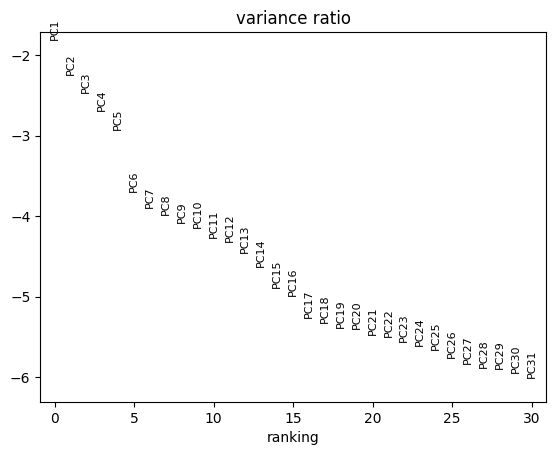

In [22]:
sc.pl.pca_variance_ratio(adata, log=True, show=False)
plt.show()

In [23]:
n_pcs = 20
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=n_pcs)  # build kNN graph
sc.tl.umap(adata)

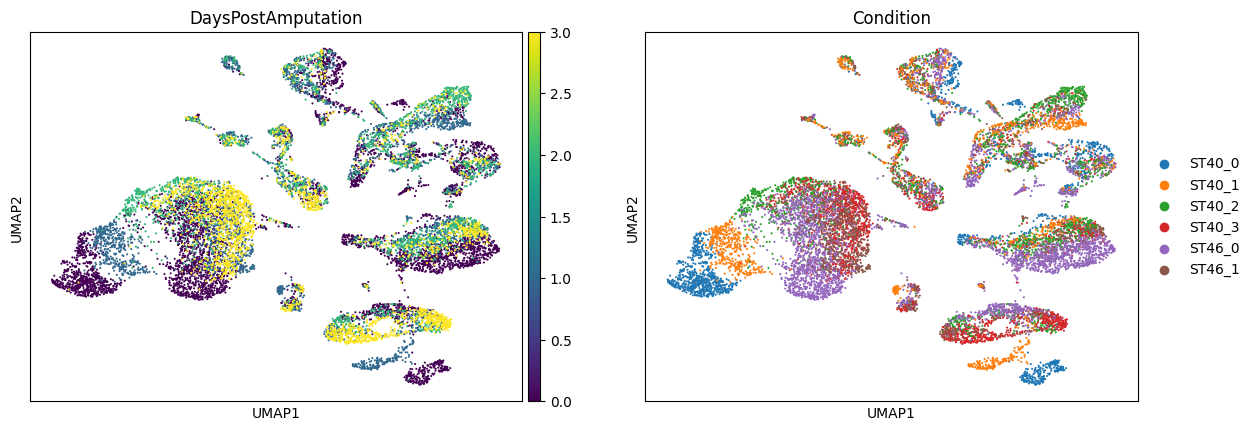

In [24]:
sc.pl.umap(adata, color=["DaysPostAmputation", "Condition"], show=False)
plt.show()

<ipython-input-29-3b2b61ce06ff>:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")


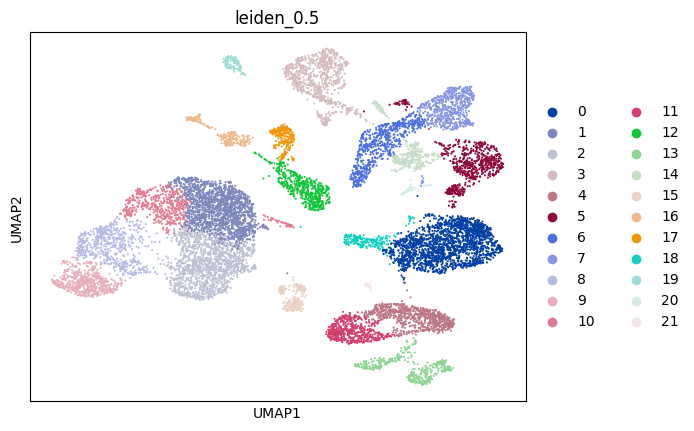

In [29]:
# Clustering Analysis
# Leiden
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")
sc.pl.umap(adata, color="leiden_0.5", show=False)
plt.show()

In [31]:
# K-means
from sklearn.cluster import KMeans

X_pca = adata.obsm["X_pca"][:, :n_pcs]  # use first 20 PCs
kmeans = KMeans(n_clusters=8, random_state=42)
adata.obs["kmeans_8"] = kmeans.fit_predict(X_pca).astype(str)

In [33]:
# Silhouette score for K-means
from sklearn.metrics import silhouette_score
sil_km = silhouette_score(X_pca, adata.obs["kmeans_8"])
print("K-means silhouette score:", sil_km)

K-means silhouette score: 0.50454855


In [35]:
# ARI
from sklearn.metrics import adjusted_rand_score

if "cluster" in adata.obs.columns:
    ari_leiden = adjusted_rand_score(adata.obs["cluster"], adata.obs["leiden_0.5"])
    ari_kmeans = adjusted_rand_score(adata.obs["cluster"], adata.obs["kmeans_8"])
    print("ARI (Leiden vs Paper clusters):", ari_leiden)
    print("ARI (K-means vs Paper clusters):", ari_kmeans)

ARI (Leiden vs Paper clusters): 0.5178840698549383
ARI (K-means vs Paper clusters): 0.5751882413613959


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

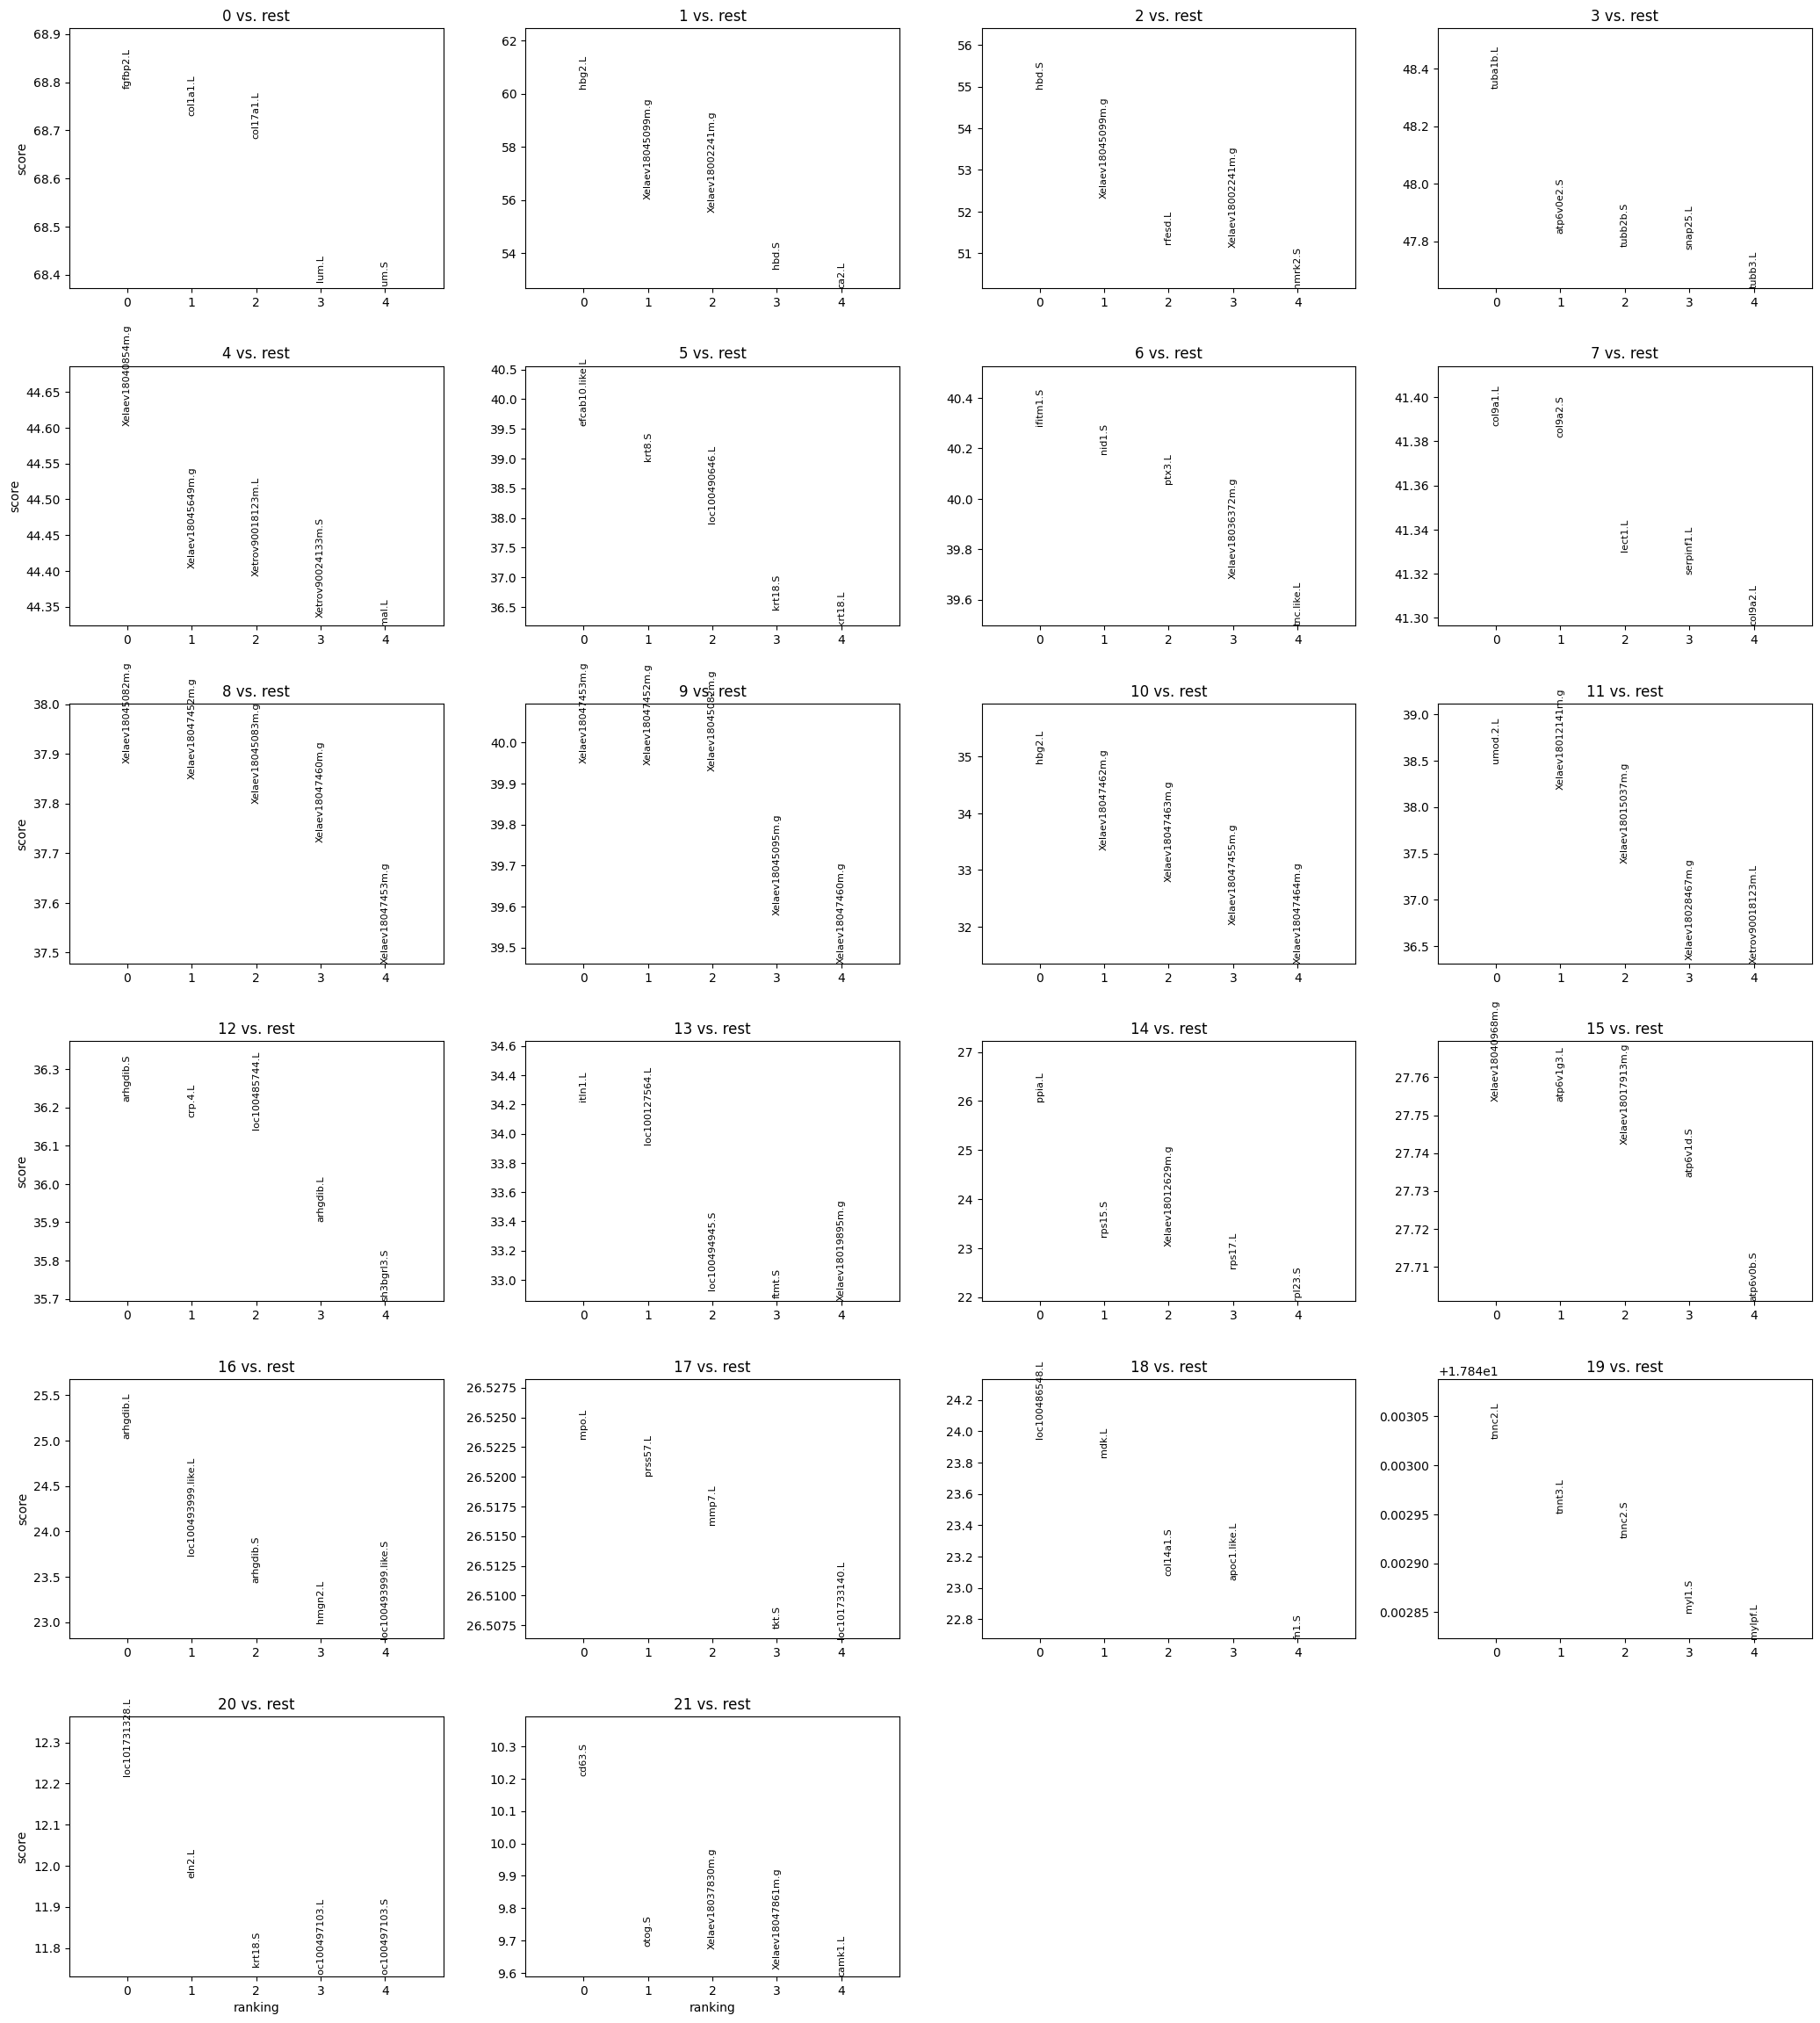

In [36]:
# Marker Gene Identification
# Wilcoxon
sc.tl.rank_genes_groups(adata, groupby="leiden_0.5", method="wilcoxon",
                        key_added="rank_wilcoxon", n_genes=100)
# Plot top 5 from Wilcoxon
sc.pl.rank_genes_groups(adata, key="rank_wilcoxon", n_genes=5, sharey=False, show=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


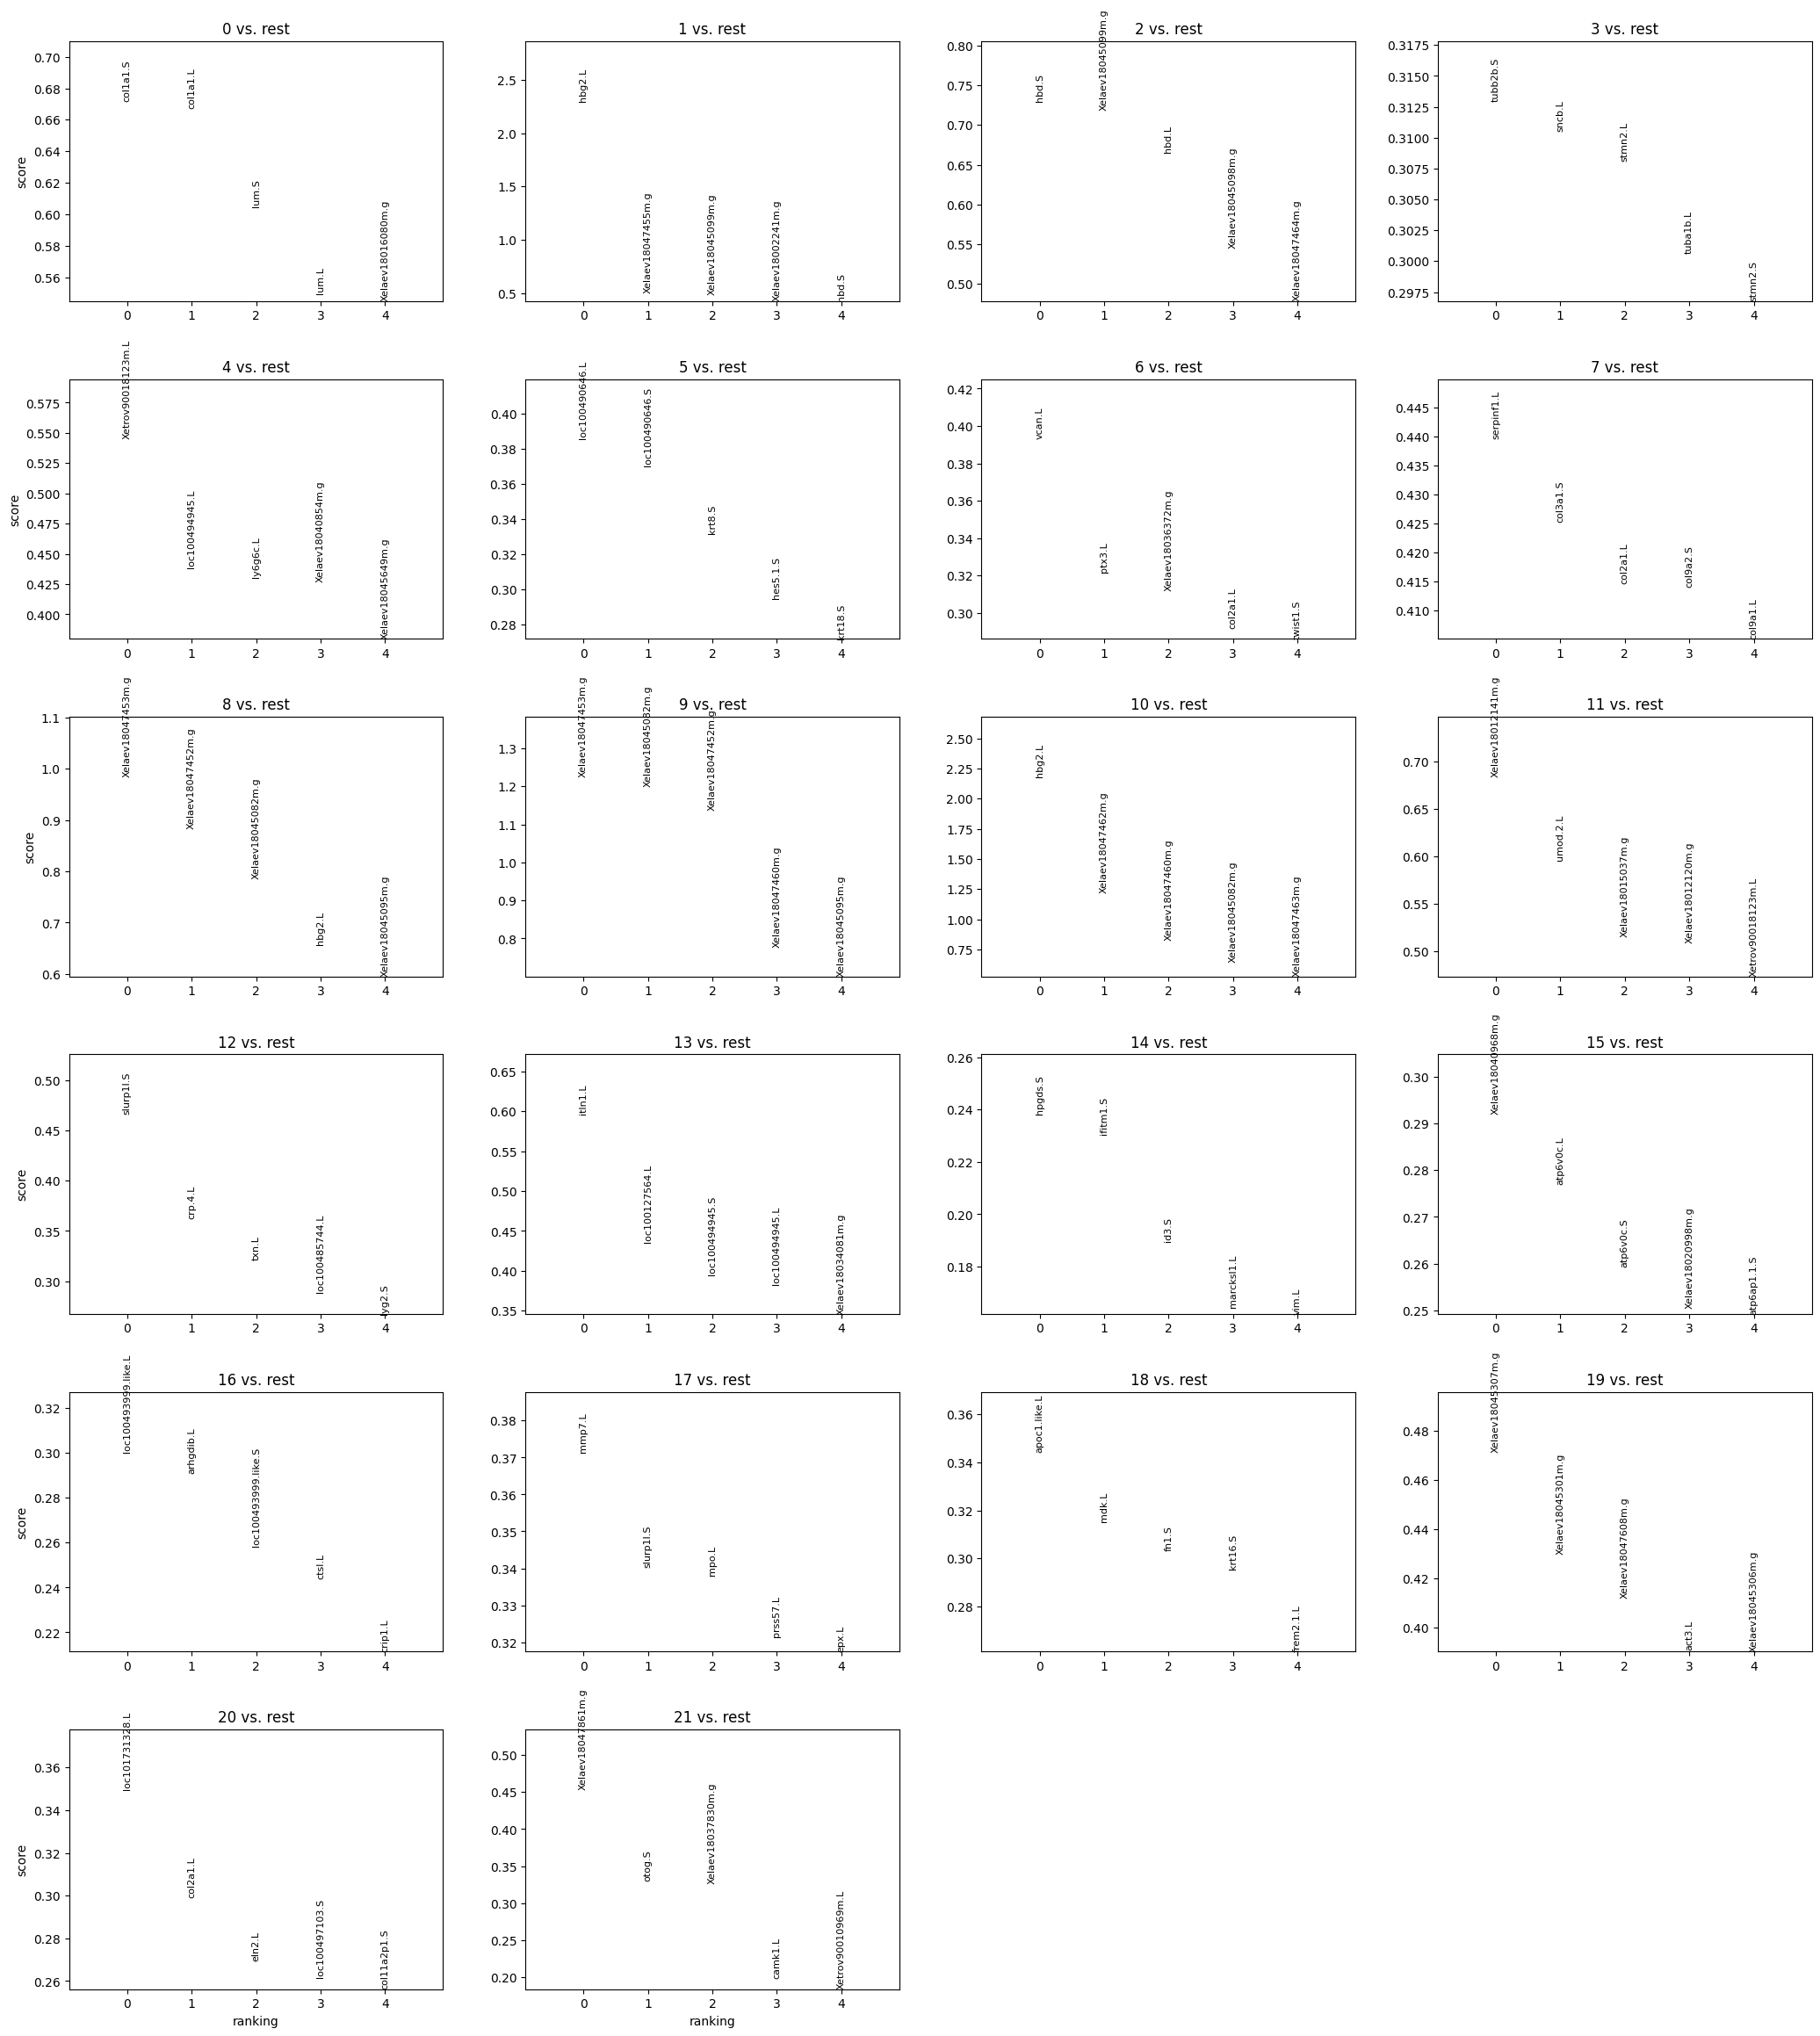

In [37]:
# Logistic Regression
sc.tl.rank_genes_groups(adata, groupby="leiden_0.5", method="logreg",
                        key_added="rank_logreg", n_genes=100)
# Plot top 5 from Logistic Regression
sc.pl.rank_genes_groups(adata, key="rank_logreg", n_genes=5, sharey=False, show=False)
plt.show()

In [38]:
# Identify the Putative ROC Cluster

KeyError: 'rank_genes_groups'

In [39]:
known_roc_markers = ["lef1", "tp63", "tp73", "wnt5a", "fgf10", "msx1", "bmp5"]
for marker in known_roc_markers:
    matches = [g for g in adata.var_names if marker.lower() in g.lower()]
    print(marker, "->", matches)

lef1 -> ['lef1.L', 'lef1.S']
tp63 -> ['tp63.L', 'tp63.S']
tp73 -> ['tp73.L']
wnt5a -> ['wnt5a.L', 'wnt5a.S']
fgf10 -> ['fgf10.L', 'fgf10.S']
msx1 -> ['msx1.L', 'msx1.S']
bmp5 -> ['bmp5.L']


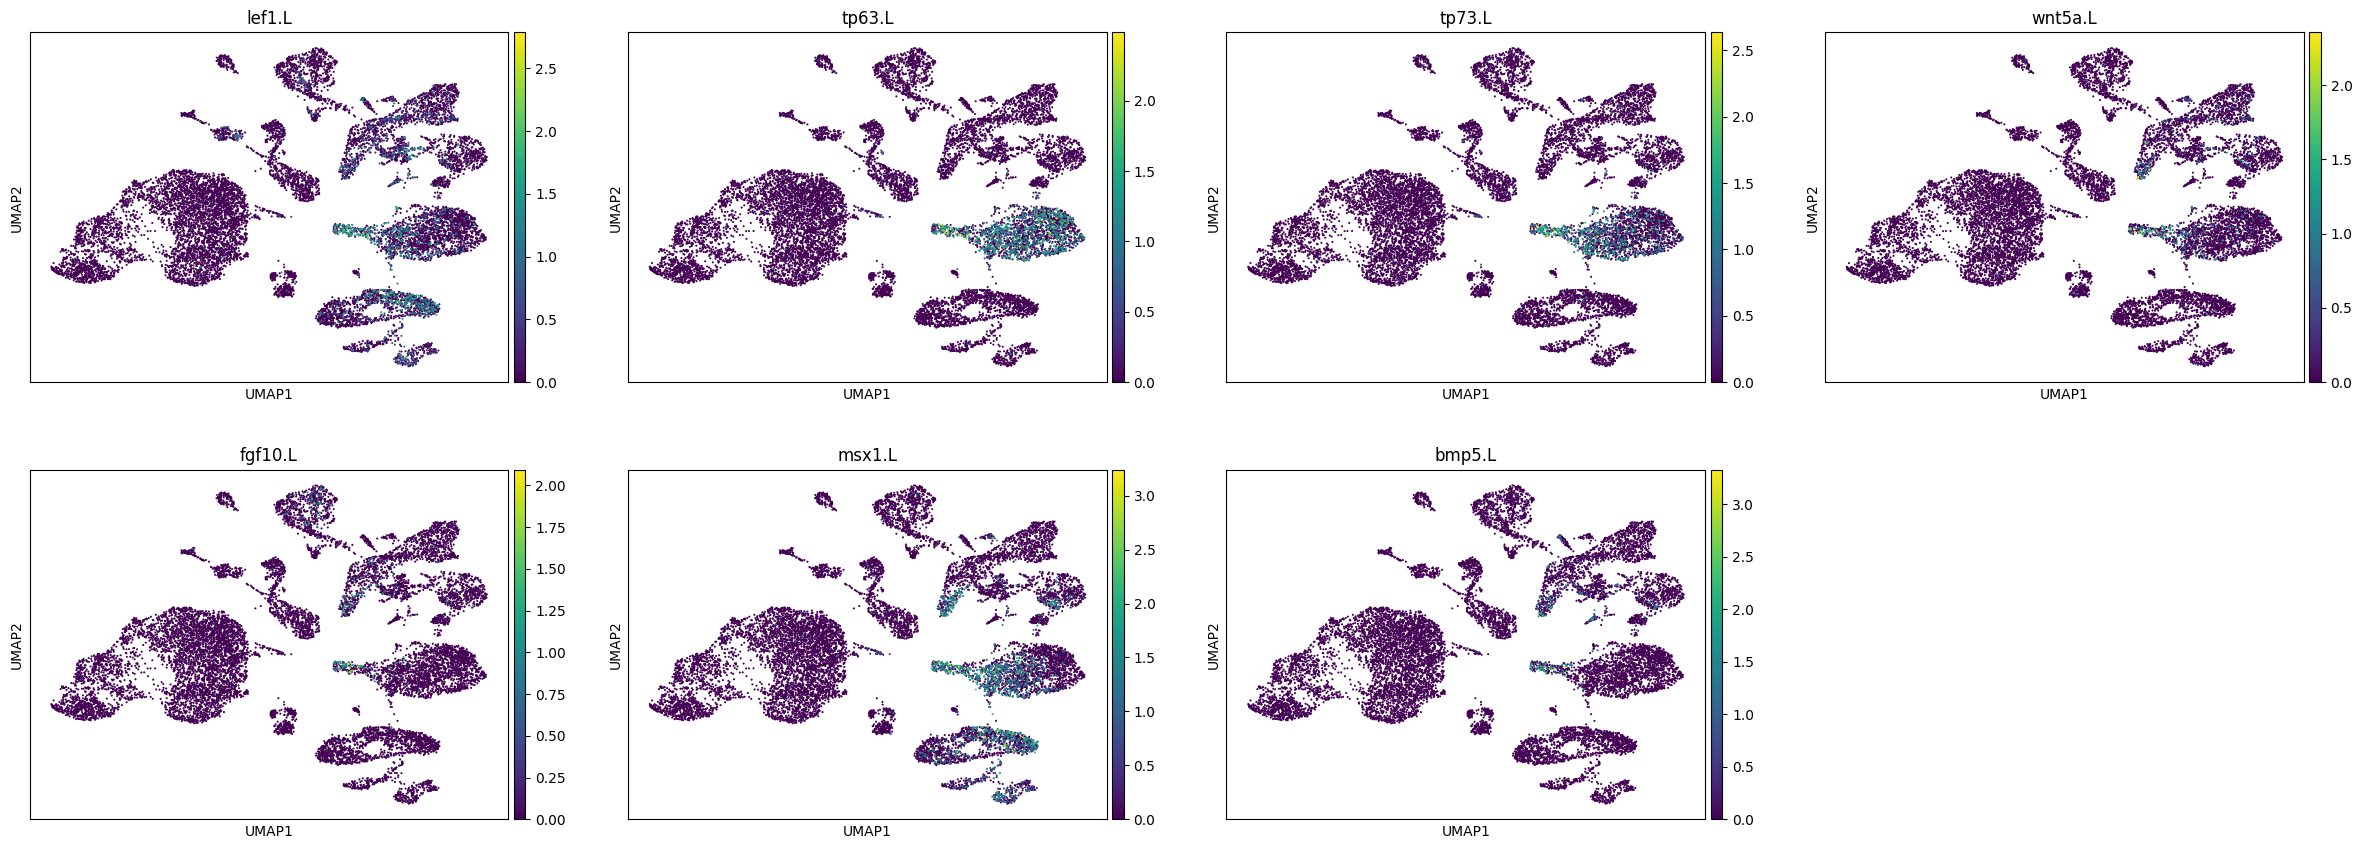

In [40]:
sc.pl.umap(adata, color=["lef1.L", "tp63.L", "tp73.L",
                         "wnt5a.L", "fgf10.L", "msx1.L", "bmp5.L"],
           show=False)
plt.show()

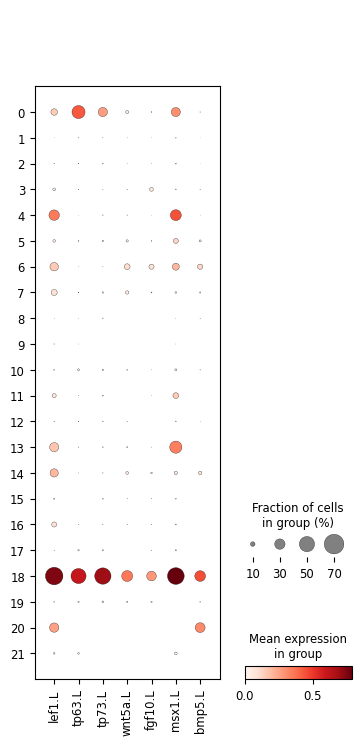

In [41]:
roc_markers = ["lef1.L", "tp63.L", "tp73.L", "wnt5a.L", "fgf10.L", "msx1.L", "bmp5.L"]

sc.pl.dotplot(adata, roc_markers, groupby="leiden_0.5")

In [42]:
# Compare with Supplementary Table 3
table3_path = "/content/drive/MyDrive/TA/aav9996_tables3.xlsx"
roc_df = pd.read_excel(table3_path, sheet_name="ROC markers")
official_roc_list = roc_df.iloc[:,0].dropna().astype(str).unique().tolist()

def remove_suffix(g):
    return g.split('.')[0].lower()

cleaned_official = [remove_suffix(g) for g in official_roc_list]

putative_roc_cluster = "18"
rank_key = "rank_wilcoxon"  # or "rank_logreg"
r = adata.uns[rank_key]

top_markers_cluster = pd.DataFrame({
    'gene': r['names'][putative_roc_cluster],
    'logfc': r['logfoldchanges'][putative_roc_cluster],
    'pvals': r['pvals'][putative_roc_cluster]
}).head(100)

cleaned_mine = [remove_suffix(g) for g in top_markers_cluster["gene"]]
overlap = set(cleaned_official).intersection(cleaned_mine)
print(f"\nPutative ROC cluster = {putative_roc_cluster}")
print(f"Top 100 markers from {rank_key} for cluster {putative_roc_cluster} have {len(overlap)} overlap with official ROC list.")
print("Overlap genes:", overlap)


Putative ROC cluster = 18
Top 100 markers from rank_wilcoxon for cluster 18 have 7 overlap with official ROC list.
Overlap genes: {'lpar3', 'pltp', 'frem2', 'vwde', 'nid2', 'igfbp2', 'egfl6'}
